### Latar Belakang
Transjakarta merupakan salah satu moda transportasi umum utama di Jakarta yang digunakan oleh jutaan penumpang setiap harinya. Dengan banyaknya jumlah perjalanan dan rute yang tersedia, manajemen Transjakarta menghadapi tantangan besar dalam memastikan layanan yang efisien dan memadai.

Tanpa analisis pola perjalanan penumpang yang memadai, Transjakarta berisiko mengalami:

- Penumpukan penumpang pada jam sibuk akibat kekurangan armada.
- Rute tidak efisien, di mana ada rute yang kelebihan armada sementara rute lain kekurangan.
- Jadwal bus yang tidak optimal, yang dapat memperpanjang waktu tunggu dan menurunkan kepuasan penumpang.

Dataset transaksi perjalanan penumpang yang tersedia, mencakup waktu naik (tap in), turun (tap out), rute, dan pembayaran, memungkinkan identifikasi jam sibuk, halte dengan jumlah penumpang terbanyak, serta rata-rata lama perjalanan. Dengan analisis ini, Transjakarta dapat mengambil keputusan strategis untuk menambah armada di jam tertentu, mengoptimalkan jadwal, serta meningkatkan kualitas layanan di koridor dengan tingkat penggunaan tertinggi.

### Permasalahan
Permasalahan yang akan dianalisis dalam proyek ini adalah:
- Bagaimana distribusi perjalanan penumpang berdasarkan waktu (jam sibuk)?
- Koridor dan halte mana yang paling banyak digunakan penumpang?
- Berapa lama rata-rata waktu perjalanan penumpang?
- Bagaimana distribusi penumpang berdasarkan kategori pembayaran (gratis atau berbayar)?
- Apakah ada perbedaan pola perjalanan berdasarkan jenis kelamin atau tahun lahir penumpang?

Dengan menjawab pertanyaan-pertanyaan tersebut, diharapkan diperoleh insight yang dapat membantu manajemen Transjakarta dalam mengoptimalkan operasi bus dan meningkatkan pengalaman penumpang.

## Data
Untuk menjawab pertanyaan di atas, kita akan menganalisis data transaksi penumpang Transjakarta.  
Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait transaksi perjalanan penumpang Transjakarta.  
Data mencakup identitas kartu, rute perjalanan, lokasi dan waktu tap in/out, serta jumlah pembayaran.  
Ada 22 kolom di dalam dataset `Transjakarta.csv`, yaitu:

- **transID** : ID unik untuk setiap transaksi.
- **payCardID** : Identitas utama pelanggan. Kartu ini digunakan untuk tap in dan tap out.
- **payCardBank** : Nama bank penerbit kartu pelanggan.
- **payCardName** : Nama pelanggan yang tertera pada kartu.
- **payCardSex** : Jenis kelamin pelanggan (sesuai data pada kartu).
- **payCardBirthDate** : Tahun lahir pelanggan.
- **corridorID** : ID koridor/rute yang digunakan (berguna untuk pengelompokan rute).
- **corridorName** : Nama koridor/rute yang berisi titik awal dan akhir perjalanan.
- **direction** : Arah perjalanan (0 = Pergi, 1 = Pulang).
- **tapInStops** : ID halte tempat pelanggan melakukan tap in.
- **tapInStopsName** : Nama halte tempat pelanggan tap in.
- **tapInStopsLat** : Latitude (garis lintang) halte tap in.
- **tapInStopsLon** : Longitude (garis bujur) halte tap in.
- **stopStartSeq** : Urutan halte dari awal perjalanan (halte ke-1, ke-2, dst).
- **tapInTime** : Waktu pelanggan melakukan tap in (tanggal & jam).
- **tapOutStops** : ID halte tempat pelanggan melakukan tap out.
- **tapOutStopsName** : Nama halte tempat pelanggan tap out.
- **tapOutStopsLat** : Latitude (garis lintang) halte tap out.
- **tapOutStopsLon** : Longitude (garis bujur) halte tap out.
- **stopEndSeq** : Urutan halte sampai akhir perjalanan (halte ke-1, ke-2, dst).
- **tapOutTime** : Waktu pelanggan melakukan tap out (tanggal & jam).
- **payAmount** : Jumlah yang dibayar pelanggan. Ada yang gratis, ada yang berbayar.



In [3]:

Transjakarta_dataset = pd.read_csv (r"C:\Users\PT Netzmi Kreasi\Desktop\Python\Transjakarta.csv")
display(Transjakarta_dataset.head(),Transjakarta_dataset.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning

Sebelum masuk ke tahap analisis, kita perlu memahami dataset Transjakarta secara menyeluruh melalui tahap data understanding. Tahap ini mencakup:

- Mengetahui jumlah baris dan kolom,
- Mengecek tipe data pada setiap kolom,
- Mengidentifikasi data yang hilang (missing value) dan potensi outlier.

Setelah itu, kita akan melakukan analisis pendukung, seperti:

- Menampilkan distribusi data untuk melihat apakah ada outlier yang signifikan,
- Menghitung proporsi missing value pada setiap kolom,
- Melihat ringkasan statistik (mean, median, quartile).

Berdasarkan hasil analisis ini, kita dapat menentukan metode data cleaning yang tepat. Misalnya, jika ditemukan outlier ekstrem, imputasi missing value akan menggunakan median karena lebih robust terhadap outlier dibandingkan mean. Dengan demikian, setiap langkah cleaning memiliki justifikasi yang jelas dan berbasis data.

In [4]:
print(f"Jumlah baris dan kolom pada dataset adalah {Transjakarta_dataset.shape}")
Transjakarta_dataset.info()

Jumlah baris dan kolom pada dataset adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null

In [5]:
display(Transjakarta_dataset.describe(), Transjakarta_dataset.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [6]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in Transjakarta_dataset.columns :
    listItem.append( [col, Transjakarta_dataset[col].nunique(), Transjakarta_dataset[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

In [7]:
# Cek kolom missing value nan
Transjakarta_dataset.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [8]:
# Menampilkan semua baris yang punya missing value
Transjakarta_dataset[Transjakarta_dataset.isna().any(axis=1)]


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,...,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,...,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,...,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
37882,YMCL988A7J02QF,180074952289665,emoney,Asmadi Setiawan,F,1971,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B01732P,...,106.86825,11,2023-04-30 08:41:09,B01169P,Jln. Jatinegara Timur IV,-6.222457,106.86816,13.0,2023-04-30 10:07:19,NaN
37885,KUXY021D6I25YN,30169751274025,bni,Prasetya Wasita,M,1986,3B,NaN,1.0,B04610P,...,106.72736,2,2023-04-08 10:46:06,B00192P,BSI Cengkareng,-6.147973,106.72781,3.0,2023-04-08 13:06:42,0.0
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,...,106.88830,5,2023-04-04 14:52:31,NaN,Pramuka LIA,-6.192238,106.86858,9.0,2023-04-04 15:38:58,3500.0


In [9]:
# Daftar nama kolom yang memiliki missing value
Transjakarta_dataset.columns[Transjakarta_dataset.isna().any()].tolist()



['corridorID',
 'corridorName',
 'tapInStops',
 'tapOutStops',
 'tapOutStopsName',
 'tapOutStopsLat',
 'tapOutStopsLon',
 'stopEndSeq',
 'tapOutTime',
 'payAmount']

Secara umum, kita bisa melihat bahwa:
* dataset Transjakarta memiliki 22 kolom dan 37.900 baris
* beberapa kolom, yaitu, `corridorID`, `corridorName`,`tapInStops`, `tapOutStops`,`tapOutStopsName`,`tapOutStopsLat`,`tapOutStopsLon`,
 `stopEndSeq`,`tapOutTime`dan `payAmount`  memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* Kolom `transID` berisi ID unik untuk tiap transaksi, sehingga tidak relevan untuk analisis agregat dan bisa dihapus jika tidak diperlukan untuk identifikasi transaksi.
* Kolom `payCardBirthDate` saat ini bertipe numerik (tahun lahir), namun sebaiknya dipastikan formatnya benar agar bisa digunakan untuk analisis umur penumpang.
* Kolom `tapInTime` dan `tapOutTime` bertipe object (string). Kedua kolom ini sebaiknya dikonversi menjadi tipe datetime agar dapat digunakan untuk analisis jam sibuk dan lama perjalanan.
* Kolom koordinat (`tapInStopsLat`, `tapInStopsLon`, `tapOutStopsLat`, `tapOutStopsLon`) dapat dipertahankan jika ingin melakukan analisis spasial atau membuat peta, jika tidak digunakan dapat dihapus untuk menghemat memori.
* Beberapa kolom kategorikal, seperti `payCardSex`, `corridorName`, atau `tapInStopsName`, bisa digunakan langsung untuk analisis distribusi. Tidak perlu diubah ke numerik kecuali jika ingin dipakai dalam model machine learning.

### Missing Value

In [10]:
# Hitung persentase missing value di tiap kolom
missing_percentage = Transjakarta_dataset.isna().sum() / Transjakarta_dataset.shape[0] * 100
missing_percentage



transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

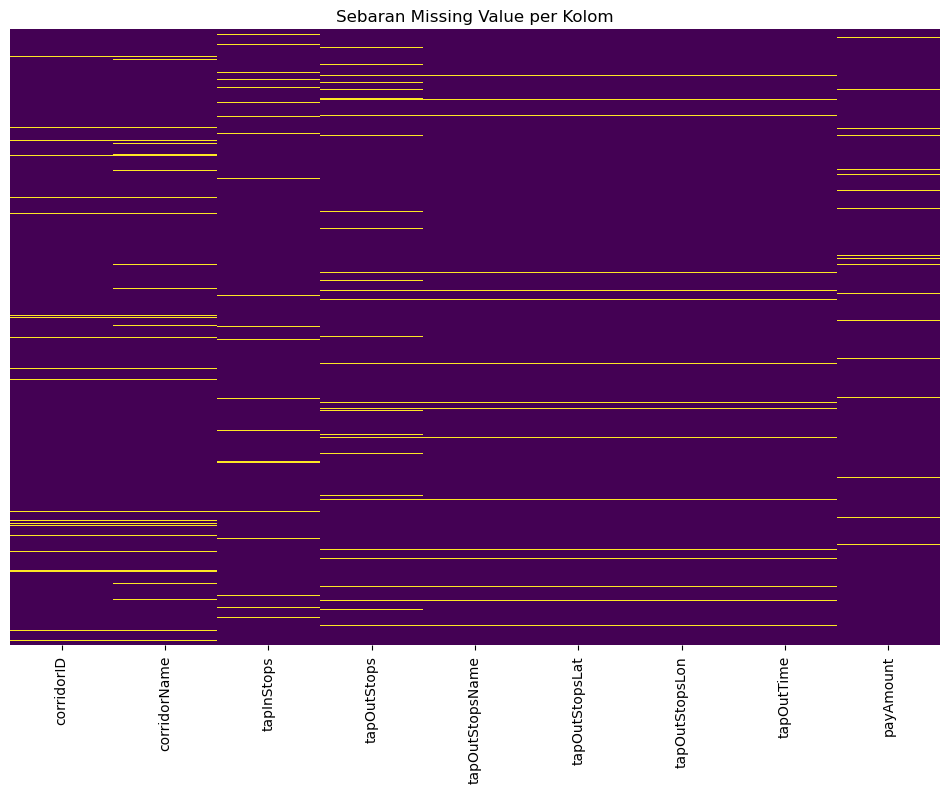

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    Transjakarta_dataset[['corridorID','corridorName','tapInStops','tapOutStops',
                          'tapOutStopsName','tapOutStopsLat','tapOutStopsLon',
                          'tapOutTime','payAmount']].isna(),
    cbar=False,   # tidak usah ada color bar
    yticklabels=False,  # baris terlalu banyak, jadi disembunyikan
    cmap='viridis'  # bisa juga "coolwarm", "crest", dll.
)
plt.title("Sebaran Missing Value per Kolom")
plt.show()


Secara garis besar:  
* *missing value* di kolom `tapOutStops` memiliki proporsi yang cukup tinggi (>6%), diikuti oleh `corridorName` (>5%), dan kolom lain seperti `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, dan `tapOutTime` sekitar 3.5%.
* *missing value* di kolom `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, dan `tapOutTime` kemungkinan besar berkaitan, karena seluruh kolom tersebut menggambarkan data tap-out (pemberhentian akhir). Jika satu kolom tap-out kosong, kemungkinan kolom lainnya juga kosong. Ini bisa menunjukkan penumpang tidak melakukan tap-out (mungkin karena sistem atau penumpang lupa).  

Ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris atau kolom yang berisi missing value. Cara ini tidak disarankan dalam kasus ini, karena jumlah missing value cukup signifikan dan penghapusan akan menyebabkan hilangnya banyak data perjalanan yang mungkin penting untuk analisis.
* Kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

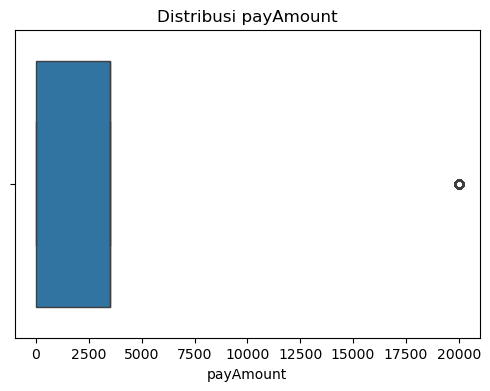

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x=Transjakarta_dataset['payAmount'])
plt.title("Distribusi payAmount")
plt.show()

Dari visualisasi boxplot di atas, terlihat bahwa sebagian besar payAmount berada pada kisaran Rp0 – Rp5.000, dengan satu outlier sekitar Rp20.000.

Outlier ini berpotensi memengaruhi nilai rata-rata (mean) sehingga menjadi bias jika digunakan sebagai imputasi.
Oleh karena itu, diputuskan untuk menggunakan median sebagai metode imputasi missing value pada kolom payAmount, karena median lebih robust terhadap outlier dan merepresentasikan nilai tengah dari mayoritas data.

In [14]:
# Hitung mean dan median
mean_pay = Transjakarta_dataset['payAmount'].mean()
median_pay = Transjakarta_dataset['payAmount'].median()

# Hitung IQR (Interquartile Range) untuk deteksi outlier
Q1 = Transjakarta_dataset['payAmount'].quantile(0.25)
Q3 = Transjakarta_dataset['payAmount'].quantile(0.75)
IQR = Q3 - Q1

# Definisi outlier: nilai di bawah Q1 - 1.5*IQR atau di atas Q3 + 1.5*IQR
outliers = Transjakarta_dataset[
    (Transjakarta_dataset['payAmount'] < (Q1 - 1.5 * IQR)) |
    (Transjakarta_dataset['payAmount'] > (Q3 + 1.5 * IQR))
]

print(f"Mean payAmount   : {mean_pay:.2f}")
print(f"Median payAmount : {median_pay:.2f}")
print(f"Jumlah outlier   : {len(outliers)}")
print(f"Persentase outlier: {(len(outliers)/len(Transjakarta_dataset))*100:.2f}%")

Mean payAmount   : 2699.71
Median payAmount : 3500.00
Jumlah outlier   : 1742
Persentase outlier: 4.60%


Hasil visualisasi menggunakan boxplot menunjukkan adanya outlier di kolom payAmount.
Perhitungan statistik mendukung temuan ini:

Mean payAmount = 2.699
Median payAmount = 3.500
Jumlah outlier = 1.742 baris atau sekitar 4,6% dari total data

Perbedaan antara mean dan median cukup signifikan, yang mengindikasikan distribusi payAmount tidak simetris dan cenderung memiliki nilai ekstrem.
Karena median lebih robust terhadap outlier dibandingkan mean, maka imputasi menggunakan median menjadi pilihan yang lebih tepat agar hasil analisis tidak terdistorsi oleh nilai ekstrem tersebut.

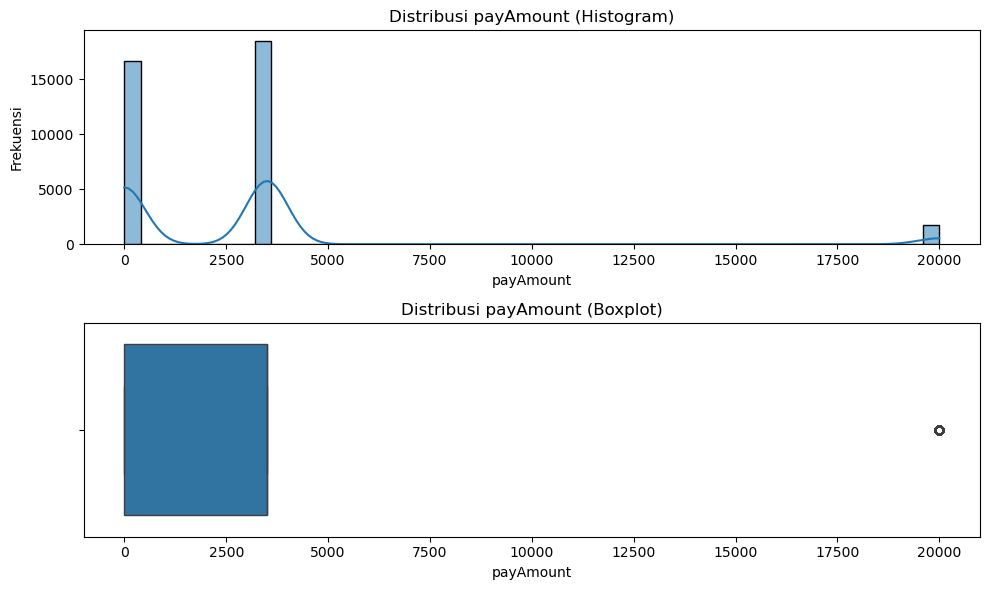

In [ ]:
plt.figure(figsize=(10,6))

# histogram
plt.subplot(2,1,1)
sns.histplot(Transjakarta_dataset['payAmount'], bins=50, kde=True)
plt.title("Distribusi payAmount (Histogram)")
plt.xlabel("payAmount")
plt.ylabel("Frekuensi")

# boxplot
plt.subplot(2,1,2)
sns.boxplot(x=Transjakarta_dataset['payAmount'])
plt.title("Distribusi payAmount (Boxplot)")
plt.xlabel("payAmount")

plt.tight_layout()
plt.show()

Distribusi payAmount terlihat right-skewed (condong ke kanan) dengan banyak data di bawah 5000 dan beberapa outlier dengan nilai sangat tinggi. Visualisasi boxplot mengkonfirmasi adanya nilai ekstrem. Karena itu, median dipilih sebagai metode imputasi yang lebih robust terhadap outlier.

In [ ]:
df = Transjakarta_dataset.copy()

In [ ]:
# Konversi kolom waktu ke datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')   # errors='coerce' → kalau gagal parsing jadi NaT
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')

In [ ]:
# Pastikan kolom angka jadi numeric
numeric_cols = ['payAmount','tapInStopsLat','tapInStopsLon','tapOutStopsLat','tapOutStopsLon','stopStartSeq','stopEndSeq']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Pastikan kolom ID disimpan sebagai string
id_cols = ['transID', 'payCardID', 'corridorID', 'tapInStops', 'tapOutStops']
for col in id_cols:
    if col in df.columns:
        df[col] = df[col].astype(str)


In [ ]:
# Normalisasi Teks
text_cols = ['corridorName', 'tapInStopsName', 'tapOutStopsName']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.title()  # hapus spasi berlebih + capital tiap kata

In [ ]:
# Cek data yang tapOutTime lebih kecil dari tapInTime
invalid_time = df[df['tapOutTime'] < df['tapInTime']]
print(f"Jumlah data dengan tapOutTime < tapInTime: {len(invalid_time)}")

Jumlah data dengan tapOutTime < tapInTime: 0


In [ ]:
# Cek data payAmount yang negatif
invalid_payment = df[df['payAmount'] < 0]
print(f"Jumlah data dengan payAmount negatif: {len(invalid_payment)}")

Jumlah data dengan payAmount negatif: 0


In [ ]:
# Cek koordinat di luar range normal
invalid_coords = df[(df['tapInStopsLat'] < -90) | (df['tapInStopsLat'] > 90) |
                    (df['tapInStopsLon'] < -180) | (df['tapInStopsLon'] > 180)]
print(f"Jumlah data dengan koordinat tidak wajar: {len(invalid_coords)}")

Jumlah data dengan koordinat tidak wajar: 0


In [ ]:
print("Data setelah pembersihan format sudah siap dicek.")
df.info()

Data setelah pembersihan format sudah siap dicek.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  object        
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        37900 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        37900 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 no

In [ ]:
df['payCardBirthDate'] = pd.to_datetime(df['payCardBirthDate'], format='%Y', errors='coerce')
df['age'] = pd.Timestamp.now().year - df['payCardBirthDate'].dt.year
print(df[['payCardBirthDate','age']].head())
print(df[['age']].describe())

  payCardBirthDate  age
0       2008-01-01   17
1       1997-01-01   28
2       1992-01-01   33
3       1978-01-01   47
4       1982-01-01   43
                age
count  37900.000000
mean      34.910686
std       13.051482
min       13.000000
25%       24.000000
50%       35.000000
75%       43.000000
max       79.000000


In [ ]:
print("Data setelah pembersihan format sudah siap dicek.")
df.info()

Data setelah pembersihan format sudah siap dicek.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  object        
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  datetime64[ns]
 6   corridorID        37900 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        37900 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 no

Untuk mengisi missing value `corridorID `kita bisa lakukan dengan cara berikut: 

`corridorID ` = ID unik koridor (misalnya: "1A", "1B").
 `corridorName ` = nama koridor (misalnya: "Blok M – Kota", "Kalideres – Pasar Baru").
 
Jadi setiap  `corridorID ` pasti punya  `corridorName ` yang sama untuk semua baris.
Kalau ada baris yang  `corridorName `-nya kosong, kita bisa isi berdasarkan baris lain yang punya  `corridorID ` sama (karena nama koridor pasti konsisten untuk ID tersebut).

In [ ]:
# Isi missing corridorName berdasarkan corridorID
if 'corridorName' in df.columns:
    df['corridorName'] = df.groupby('corridorID')['corridorName'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
    )

Untuk mengisi missing value `tapOutStopsName` kita bisa lakukan dengan cara berikut: 

`tapOutStops` = ID halte tujuan (unik per halte).
`tapOutStopsName` = nama halte tujuan.
`tapOutStopsLat` & `tapOutStopsLon` = koordinat (latitude & longitude) halte tujuan.

Kalau kita tahu `tapOutStops`-nya, maka, Nama halte `tapOutStopsName` pasti sama. Koordinat halte `tapOutStopsLat` & `tapOutStopsLon` pasti sama.

Jadi kalau salah satu baris punya `tapOutStopsName` kosong, kita bisa isi dengan nilai dari baris lain yang punya `tapOutStops` sama (karena tempatnya pasti sama → nama & koordinatnya juga sama).

In [ ]:
# Isi missing tapOutStopsName, tapOutStopsLat, tapOutStopsLon berdasarkan tapOutStops ---
for col in ['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']:
    if col in df.columns:
        df[col] = df.groupby('tapOutStops')[col].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
        )

selanjutnya setelah kita isi missing value , kita buat kolom baru `trip_duration` untuk melihat berapa lama setiap perjalanan berlangsung, setelah itu kita hitung rata-rata per `corridorID`untuk mengisi `tapOutTime` yang kosong

In [ ]:
# Rata-rata durasi perjalanan per koridor
if 'tapOutTime' in df.columns and 'tapInTime' in df.columns:
    df['trip_duration'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60  # menit
    mean_duration = df.groupby('corridorID')['trip_duration'].mean()

In [ ]:
# Isi missing tapOutTime dengan estiamsi tapInTime + rata-rata durasi koridor
df.loc[df['tapOutTime'].isna(), 'tapOutTime'] = df.loc[df['tapOutTime'].isna()].apply(
        lambda row: row['tapInTime'] + pd.Timedelta(
            minutes=mean_duration.get(row['corridorID'], mean_duration.mean())
        ),
        axis=1
    )

Untuk mengisi missing value di `payAmount` data di grouping berdasarkan `corridorID`. Tarif d koridor yang sama biasanya relatif seragam (atau punya pola yang mirip). Untuk setiap baris yang `payAmount` nya kosong (Nan) akan diisi dengan median koridor tersebut alasannya Median lebih tahan terhadap outlier dibanding Mean, misalnya ada data error yang `payAmount`-nya terlalu besar (misalnya Rp 999.999), itu tidak akan mempengaruhi median terlalu banyak.

In [ ]:
# Isi missing payAmount dengan median per koridor
if 'payAmount' in df.columns:
    df['payAmount'] = df.groupby('corridorID')['payAmount'].transform(
        lambda x: x.fillna(x.median())
    )

In [ ]:
print("Jumlah missing value setelah imputasi:")
print(df.isna().sum())


Jumlah missing value setelah imputasi:
transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq          1344
tapOutTime             0
payAmount            976
age                    0
trip_duration       1344
dtype: int64


## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [ ]:
df = df.copy()
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,trip_duration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008-01-01,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,17,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997-01-01,6C,Stasiun Tebet - Karet Via Patra Kuningan,0.0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,28,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992-01-01,R1A,Pantai Maju - Kota,0.0,B00499P,...,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,33,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978-01-01,11D,Pulo Gebang - Pulo Gadung 2 Via Pik,0.0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,47,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982-01-01,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,43,39.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004-01-01,6B,Ragunan - Mh Thamrin Via Semanggi,1.0,P00261,...,2023-04-21 18:18:37,P00228,Smk 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,21,97.200000
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974-01-01,9N,Pinang Ranti - Pramuka,1.0,P00064,...,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,51,35.850000
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976-01-01,1T,Cibubur - Balai Kota,1.0,B02873P,...,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,49,177.633333
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976-01-01,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,2023-04-15 19:59:26,B01787P,Jpo Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,49,28.400000


# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Karakteristik perjalanan penumpang**.  

Analisis akan dilakukan dengan membandingkan beberapa variabel penting:
Misalnya koridor yang dipilih, halte tap-in dan tap-out, waktu perjalanan, durasi perjalanan, pembayaran, jenis kelamin, dan kelompok umur.

Karena beberapa kategori (misal `payCardSex`, `age_group`, `is_paid`) mungkin tidak seimbang, perbandingan sebaiknya dilakukan menggunakan rasio atau persentase, bukan jumlah absolut, agar insight lebih representatif.

Dengan analisis ini, kita berharap bisa menjawab pertanyaan-pertanyaan berikut:
- Jam sibuk perjalanan → kapan puncak penumpang menggunakan Transjakarta.
- Koridor dan halte paling populer → rute yang paling padat dan ramai.
- Durasi rata-rata perjalanan → mengevaluasi efisiensi tiap koridor.
- Distribusi pembayaran (gratis vs berbayar) → pola pembayaran penumpang.
- Perbedaan pola perjalanan berdasarkan gender dan usia → insight demografis   penumpang.

Hasil dari analisis ini diharapkan bisa membantu manajemen Transjakarta dalam:
- Mengoptimalkan operasional bus.
- Meningkatkan pengalaman penumpang.
- Membuat keputusan berbasis data terkait rute, jadwal, dan tarif.

In [ ]:
df['hour'] = df['tapInTime'].dt.hour

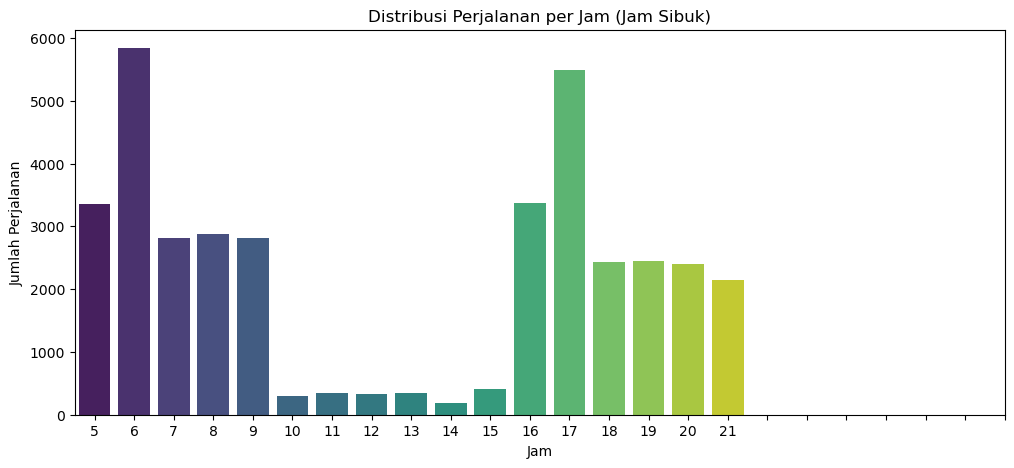

In [ ]:
# Distribusi perjalanan berdasarkan jam
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='hour', palette='viridis')
plt.title('Distribusi Perjalanan per Jam (Jam Sibuk)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(range(0,24))
plt.show()

Visualisasi distribusi perjalanan per jam ini penting untuk memahami pola penggunaan Transjakarta sepanjang hari. Dengan grafik ini, kita bisa:

- Mengidentifikasi jam sibuk (peak hours):
Puncak jumlah perjalanan pada jam tertentu menunjukkan waktu di mana permintaan transportasi paling tinggi. Informasi ini membantu manajemen Transjakarta dalam menambah armada atau menyesuaikan jadwal bus di jam tersebut.

- Mendeteksi jam dengan permintaan rendah:
Jam dengan jumlah perjalanan yang rendah dapat menjadi pertimbangan untuk mengurangi frekuensi bus, sehingga armada bisa dialihkan ke rute atau jam yang lebih membutuhkan.

- Dasar pengambilan keputusan operasional:
Dengan mengetahui jam sibuk dan jam sepi, manajemen dapat mengoptimalkan jadwal, armada, dan rute agar lebih efisien dan sesuai kebutuhan penumpang.

Meningkatkan pengalaman penumpang:
Optimalisasi jumlah armada di jam sibuk dapat mengurangi kepadatan dan waktu tunggu, sehingga meningkatkan kenyamanan penumpang.

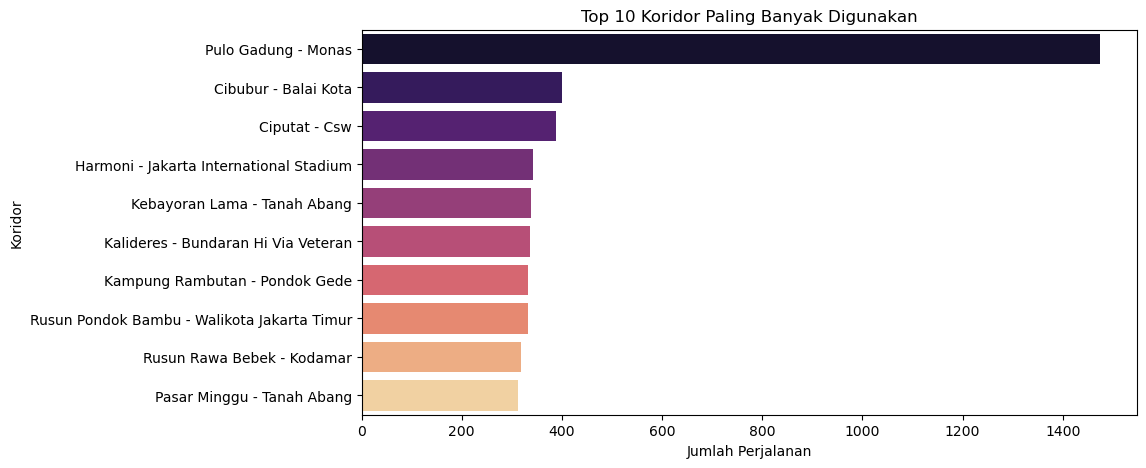

In [ ]:
# Koridor paling banyak digunakan
top_corridors = df['corridorName'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_corridors.values, y=top_corridors.index, palette='magma')
plt.title('Top 10 Koridor Paling Banyak Digunakan')
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Koridor')
plt.show()


Mengetahui koridor dengan jumlah perjalanan tertinggi penting untuk:

- Perencanaan operasional: Koridor yang paling sibuk membutuhkan frekuensi bus lebih tinggi dan fasilitas penunjang yang memadai.
- Optimalisasi infrastruktur: Data ini membantu manajemen menentukan prioritas dalam pemeliharaan dan pengembangan koridor.
- Analisis pola mobilitas: Dengan melihat pola penggunaan per koridor, kita dapat memahami daerah dengan mobilitas tertinggi di Jakarta.

Untuk menjawab pertanyaan ini, kita menghitung jumlah perjalanan per koridor dan menampilkan 10 koridor dengan penggunaan tertinggi menggunakan bar chart.

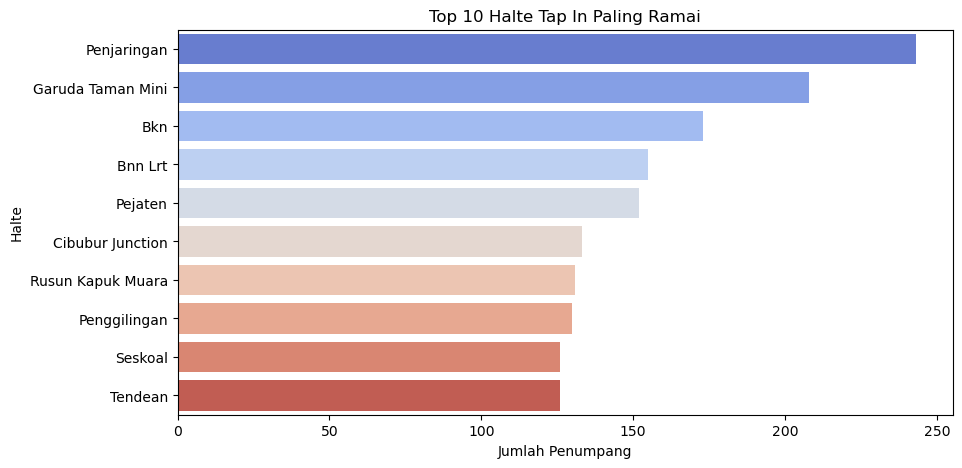

In [ ]:
# Halte paling ramai untuk tap in 
top_tapInStops = df['tapInStopsName'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_tapInStops.values, y=top_tapInStops.index, palette='coolwarm')
plt.title('Top 10 Halte Tap In Paling Ramai')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Halte')
plt.show()

Untuk memahami pola mobilitas penumpang, penting untuk mengetahui halte mana yang paling sering digunakan penumpang untuk tap-in. Informasi ini berguna untuk:

- Mengidentifikasi halte dengan volume penumpang tertinggi,
- Menentukan prioritas perbaikan atau penambahan fasilitas di halte tertentu,
- Mendukung perencanaan penambahan armada pada area dengan permintaan tinggi,
- Menganalisis kebutuhan integrasi transportasi di sekitar halte dengan mobilitas tinggi.

Dengan visualisasi Top 10 Halte Tap-In Paling Ramai, kita dapat melihat halte yang menjadi pusat aktivitas utama penumpang, sehingga pengelola Transjakarta dapat menyusun strategi layanan yang lebih tepat sasaran.

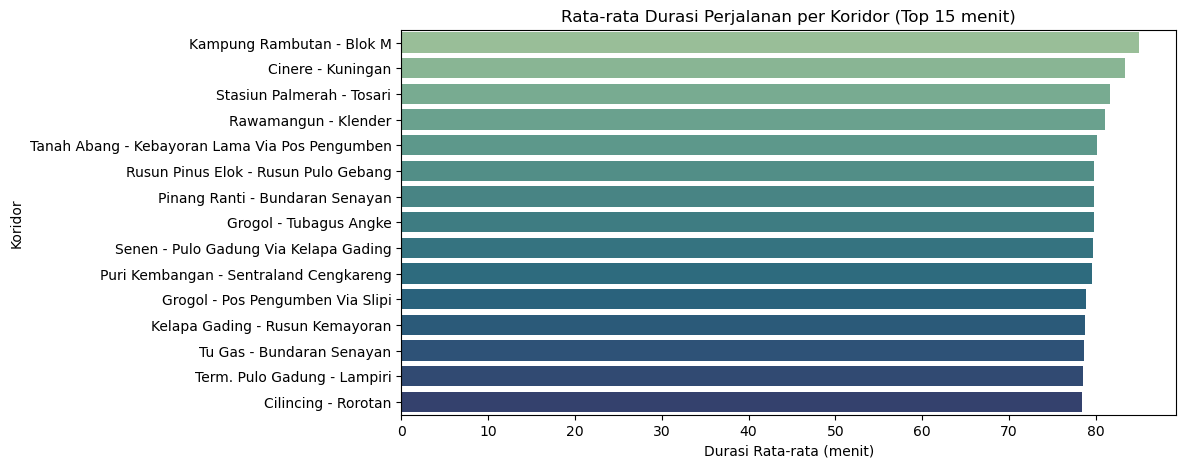

In [ ]:
# Rata-rata waktu perjalanan per koridor
top_corridors = trip_duration_corridor.head(15)  # 15 koridor terlama
plt.figure(figsize=(10,5))
sns.barplot(x=top_corridors.values, y=top_corridors.index, palette='crest')
plt.title('Rata-rata Durasi Perjalanan per Koridor (Top 15 menit)')
plt.xlabel('Durasi Rata-rata (menit)')
plt.ylabel('Koridor')
plt.show()

Visualisasi Rata-rata Durasi Perjalanan per Koridor penting dilakukan untuk:

- Mengidentifikasi koridor dengan waktu perjalanan terlama sehingga dapat dianalisis penyebab keterlambatan, seperti kepadatan lalu lintas, jumlah penumpang, atau kondisi infrastruktur.
- Membantu pengambilan keputusan terkait perbaikan rute, jadwal, atau penambahan armada pada koridor dengan waktu tempuh yang panjang.
- Mendukung perencanaan operasional agar layanan Transjakarta lebih efisien dan dapat meningkatkan kepuasan penumpang.

Dengan melihat Top 15 koridor dengan rata-rata durasi perjalanan terlama, pihak manajemen bisa fokus pada koridor yang memiliki waktu perjalanan di atas rata-rata untuk meningkatkan kinerja layanan.

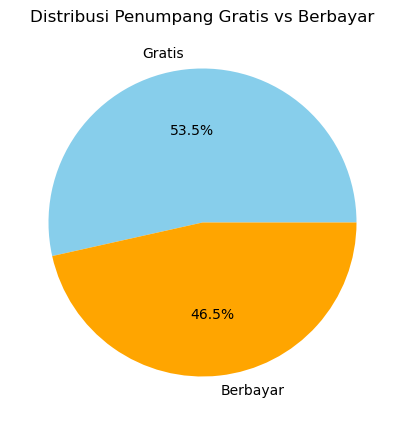

In [ ]:
# Distribusi penumpang berdasarkan kategori pembayaran
df['is_paid'] = df['payAmount'] > 0
payment_dist = df['is_paid'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(payment_dist, labels=['Gratis', 'Berbayar'], autopct='%1.1f%%', colors=['skyblue','orange'])
plt.title('Distribusi Penumpang Gratis vs Berbayar')
plt.show()

Visualisasi distribusi penumpang berdasarkan kategori pembayaran penting dilakukan untuk:

- Mengetahui proporsi penumpang gratis vs berbayar sehingga manajemen dapat memahami kontribusi pendapatan dari tiket berbayar.
- Mengukur dampak program subsidi atau layanan gratis terhadap jumlah penumpang, misalnya untuk pelajar, lansia, atau kelompok tertentu yang mungkin mendapat fasilitas gratis.
- Mendukung evaluasi kebijakan tarif apakah perlu dilakukan penyesuaian harga, promosi, atau subsidi tambahan berdasarkan komposisi pengguna berbayar dan gratis.

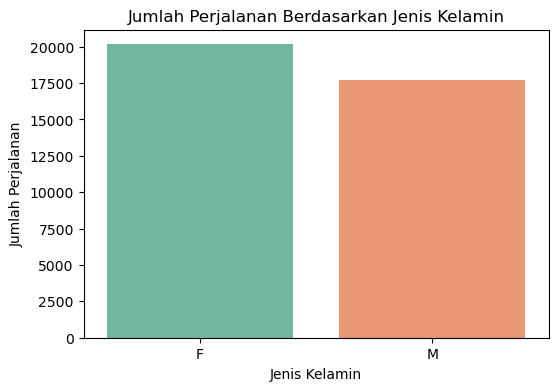

In [ ]:
# Perbedaan pola perjalanan berdasarkan jenis kelamin
gender_count = df['payCardSex'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=gender_count.index, y=gender_count.values, palette='Set2')
plt.title('Jumlah Perjalanan Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Perjalanan')
plt.show()

Visualisasi jumlah perjalanan berdasarkan jenis kelamin dilakukan untuk:

- Menganalisis pola penggunaan layanan oleh penumpang pria dan wanita, sehingga dapat dipahami apakah ada perbedaan signifikan dalam tingkat penggunaan transportasi.
- Mendukung perencanaan layanan yang ramah gender, misalnya kebutuhan keamanan, kenyamanan, atau fasilitas khusus untuk wanita di jam sibuk.
- Mengidentifikasi potensi layanan tambahan seperti bus khusus wanita jika data menunjukkan dominasi pengguna perempuan di jam-jam tertentu.

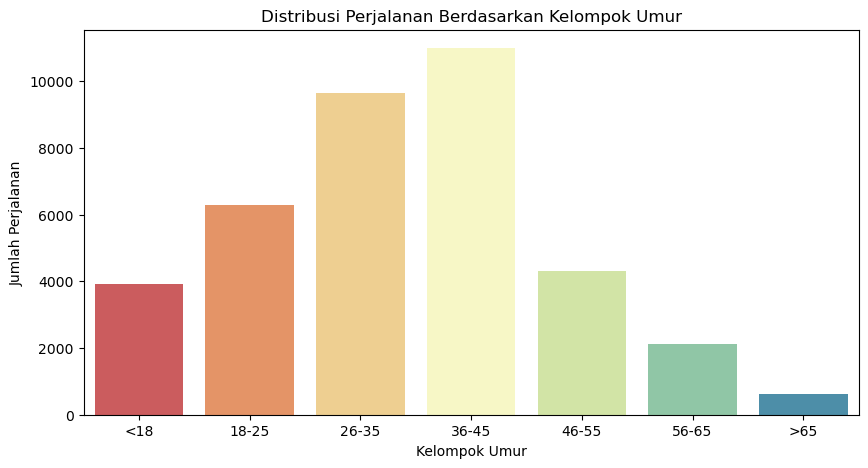

In [ ]:
# Perbedaan pola perjalanan berdasarkan kelompok umur
bins = [0, 17, 25, 35, 45, 55, 65, 100]
labels = ['<18','18-25','26-35','36-45','46-55','56-65','>65']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
age_group_count = df['age_group'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=age_group_count.index, y=age_group_count.values, palette='Spectral')
plt.title('Distribusi Perjalanan Berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Perjalanan')
plt.show()


Visualisasi distribusi perjalanan berdasarkan kelompok umur perlu dilakukan untuk:

- Memahami demografi pengguna utama transportasi, apakah didominasi usia produktif, pelajar, atau lansia.
- Mendukung kebijakan layanan seperti pemberian subsidi, fasilitas khusus untuk lansia, atau promosi untuk pelajar dan mahasiswa.
- Menganalisis potensi pertumbuhan penumpang di segmen usia tertentu untuk perencanaan jangka panjang transportasi publik.

# Kesimpulan

Dari analisis yang telah dilakukan, diperoleh beberapa temuan utama:

1. Distribusi Perjalanan per Jam:
Jam sibuk terjadi pada dua periode utama:
    - Pagi: 05:00–09:00, didominasi penumpang yang berangkat kerja/sekolah.
    - Sore: 16:00–21:00, puncak perjalanan pulang kerja/sekolah.

2. Koridor Paling Populer:
Koridor Pulo Gadung – Monas memiliki jumlah perjalanan tertinggi dibanding koridor lain, menandakan rute ini adalah jalur favorit penumpang.

3. Halte Tap-In Paling Ramai:
Halte Garuda Taman Mini dan Penjaringan tercatat sebagai halte dengan jumlah tap-in tertinggi. Kemungkinan karena dekat pusat perkantoran, fasilitas umum, atau titik transit utama.

4. Durasi Perjalanan per Koridor:
Ada koridor dengan waktu tempuh lebih lama, kemungkinan disebabkan rute panjang, kemacetan, atau banyaknya pemberhentian.

5. Distribusi Perjalanan Gratis vs Berbayar:
Sebagian kecil penumpang menggunakan fasilitas perjalanan gratis (misalnya lansia, anak-anak, atau pemegang kartu khusus), sementara mayoritas penumpang tetap berbayar.

6. Pola Perjalanan per Gender:
Penumpang perempuan melakukan sedikit lebih banyak perjalanan dibanding laki-laki, menunjukkan layanan Transjakarta digunakan secara merata oleh kedua gender.

7. Pola Perjalanan per Kelompok Umur:
Kelompok usia 18–45 tahun merupakan pengguna paling aktif, sedangkan kelompok usia >45 tahun cenderung lebih jarang menggunakan layanan ini.

# Saran

Berdasarkan temuan di atas, berikut rekomendasi spesifik yang dapat dipertimbangkan:

1. Penanganan Jam Sibuk:
    - Tambah frekuensi bus pada pukul 05:00–09:00 dan 16:00–21:00.
    - Pertimbangkan bus ekspres di rute padat seperti Pulo Gadung – Monas untuk mengurangi kepadatan dan waktu tunggu.

2. Koridor Paling Banyak Digunakan:
    - Fokus pada koridor Pulo Gadung – Monas dan Cibubur – Balai Kota dengan penambahan armada atau jalur alternatif untuk mengurangi beban koridor utama.
    - Lakukan optimasi jadwal keberangkatan agar distribusi penumpang lebih merata.

3. Halte Tap-In Paling Ramai:
    - Lakukan evaluasi alur penumpang di halte Garuda Taman Mini dan Penjaringan untuk mengurangi penumpukan.
    - Pertimbangkan pembangunan halte feeder di area sekitar untuk menyebar arus penumpang.

4. Durasi Perjalanan per Koridor:
Untuk koridor dengan durasi panjang, lakukan analisis kemacetan dan pertimbangkan jalur prioritas atau bus ekspres agar waktu tempuh lebih singkat.

5. Distribusi Gratis vs Berbayar:
    - Monitor proporsi perjalanan gratis agar tidak mempengaruhi pendapatan.
    - Evaluasi efektivitas program subsidi untuk memastikan tepat sasaran.

6. Pola Perjalanan per Gender:
Dengan dominasi penumpang perempuan, sediakan fasilitas ramah gender seperti area prioritas di bus dan peningkatan keamanan di halte saat malam hari.

7. Pola Perjalanan per Kelompok Umur:
    - Untuk usia 18–45 tahun, pertimbangkan program loyalitas seperti diskon perjalanan bulanan.
    - Untuk usia >45 tahun, lakukan edukasi penggunaan layanan digital seperti e-ticketing agar lebih mudah mengakses layanan.

Dengan memberikan kesimpulan dan saran dari hasil analisa di atas, diharapkan manajemen Transjakarta dapat mengambil keputusan berbasis data, seperti mengoptimalkan rute dan jadwal bus, meningkatkan kenyamanan penumpang, serta merencanakan program layanan yang lebih efektif dan tepat sasaran.